# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as pl
from pylab import rcParams
import statsmodels.api as sm
import plotly.express as px
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('seaborn-whitegrid')

# Import Data

In [4]:
# Aquifer_Auser = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Aquifer_Auser.csv')
# Water_Spring_Amiata = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Water_Spring_Amiata.csv')
# Aquifer_Petrignano = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Aquifer_Petrignano.csv')
# Aquifer_Doganella = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Aquifer_Doganella.csv')
# Aquifer_Luco  = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Aquifer_Luco.csv')
River_Arno = pd.read_csv('../input/acea-water-prediction/River_Arno.csv')
# Lake_Bilancino = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Lake_Bilancino.csv')
# Water_Spring_Madonna_di_Canneto = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Water_Spring_Madonna_di_Canneto.csv')
# Water_Spring_Lupa = pd.read_csv('/content/drive/My Drive/Colab Data/acea/Water_Spring_Lupa.csv')

# Aquifer_Auser['Date'] = pd.to_datetime(Aquifer_Auser['Date'], dayfirst=True)
# Water_Spring_Amiata['Date'] = pd.to_datetime(Water_Spring_Amiata['Date'], dayfirst=True)
# Aquifer_Petrignano['Date'] = pd.to_datetime(Aquifer_Petrignano['Date'], dayfirst=True)
# Aquifer_Doganella['Date'] = pd.to_datetime(Aquifer_Doganella['Date'], dayfirst=True)
# Aquifer_Luco['Date'] = pd.to_datetime(Aquifer_Luco['Date'], dayfirst=True)
River_Arno['Date'] = pd.to_datetime(River_Arno['Date'], dayfirst=True)
# Lake_Bilancino['Date'] = pd.to_datetime(Lake_Bilancino['Date'], dayfirst=True)
# Water_Spring_Madonna_di_Canneto['Date'] = pd.to_datetime(Water_Spring_Madonna_di_Canneto['Date'], dayfirst=True)
# Water_Spring_Lupa['Date'] = pd.to_datetime(Water_Spring_Lupa['Date'], dayfirst=True)

#River_Arno = River_Arno.set_index('Date')

# River_Arno

## Data Exploration

In [5]:
River_Arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [6]:
River_Arno.tail()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
8212,2020-06-26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,2020-06-27,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,2020-06-28,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,2020-06-29,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19
8216,2020-06-30,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30


In [7]:
River_Arno.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,4283.000000,1283.000000,1283.000000,4568.000000,1647.000000,1283.00000,1283.000000,2378.000000,1283.000000,6192.000000,8169.000000
mean,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.416680,2.335026,2.056709,2.42650,2.101949,2.640959,3.826968,16.605386,1.472407
std,8.025121,7.655847,7.166643,8.903134,6.650012,9.425358,6.502917,8.938863,6.347652,6.117967,7.23414,6.377879,7.161416,9.591337,7.458951,0.616259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.650000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.350000,1.300000
75%,1.200000,0.600000,1.200000,1.400000,0.800000,1.200000,1.000000,2.200000,0.800000,0.600000,0.70000,0.400000,1.200000,2.400000,22.700000,1.690000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,63.000000,114.400000,102.200000,75.000000,123.20000,95.600000,77.400000,103.600000,34.900000,6.750000


In [8]:
River_Arno.isnull().sum()

Date                            0
Rainfall_Le_Croci            2191
Rainfall_Cavallina           2191
Rainfall_S_Agata             2191
Rainfall_Mangona             2191
Rainfall_S_Piero             2191
Rainfall_Vernio              3934
Rainfall_Stia                6934
Rainfall_Consuma             6934
Rainfall_Incisa              3649
Rainfall_Montevarchi         6570
Rainfall_S_Savino            6934
Rainfall_Laterina            6934
Rainfall_Bibbiena            5839
Rainfall_Camaldoli           6934
Temperature_Firenze          2025
Hydrometry_Nave_di_Rosano      48
dtype: int64

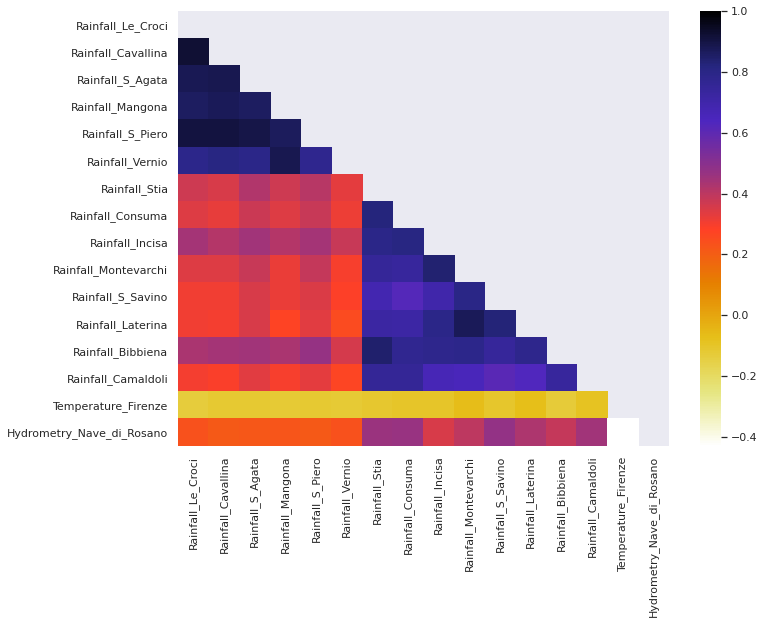

In [9]:
mask = np.triu(np.ones_like(River_Arno.corr(), dtype = bool))
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(River_Arno.corr(),mask=mask, fmt='', cmap='CMRmap_r')

In [10]:
River_Arno.shape

(8217, 17)

In [11]:
River_Arno.index

RangeIndex(start=0, stop=8217, step=1)

In [12]:
River_Arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


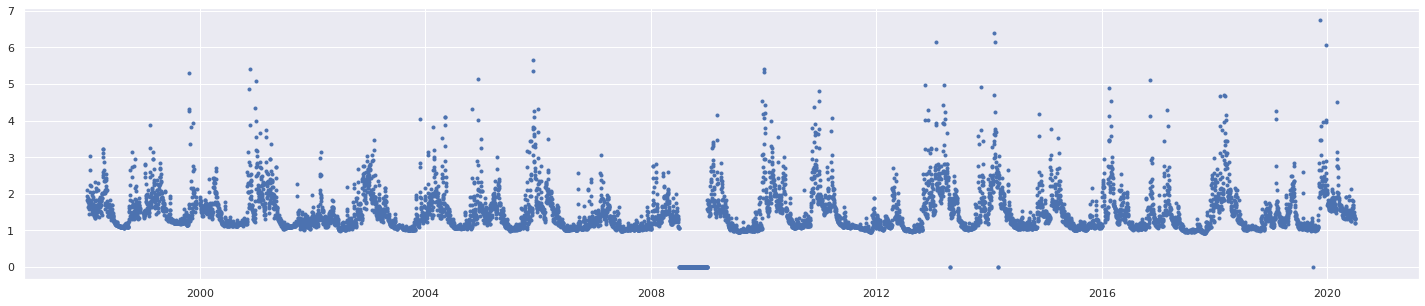

In [13]:
plt.figure(figsize=(25,5))
plt.plot(River_Arno.Date,River_Arno['Hydrometry_Nave_di_Rosano'],'b.')
plt.show()

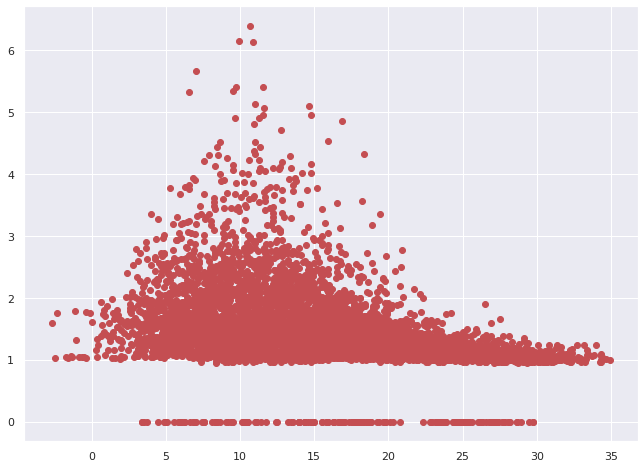

In [14]:
plt.plot(River_Arno['Temperature_Firenze'],River_Arno['Hydrometry_Nave_di_Rosano'],'ro')
plt.show()

In [15]:
River_Arno['year'] = [d.year for d in River_Arno.Date]
River_Arno['month'] = [d.strftime('%b') for d in River_Arno.Date]
years = River_Arno['year'].unique()

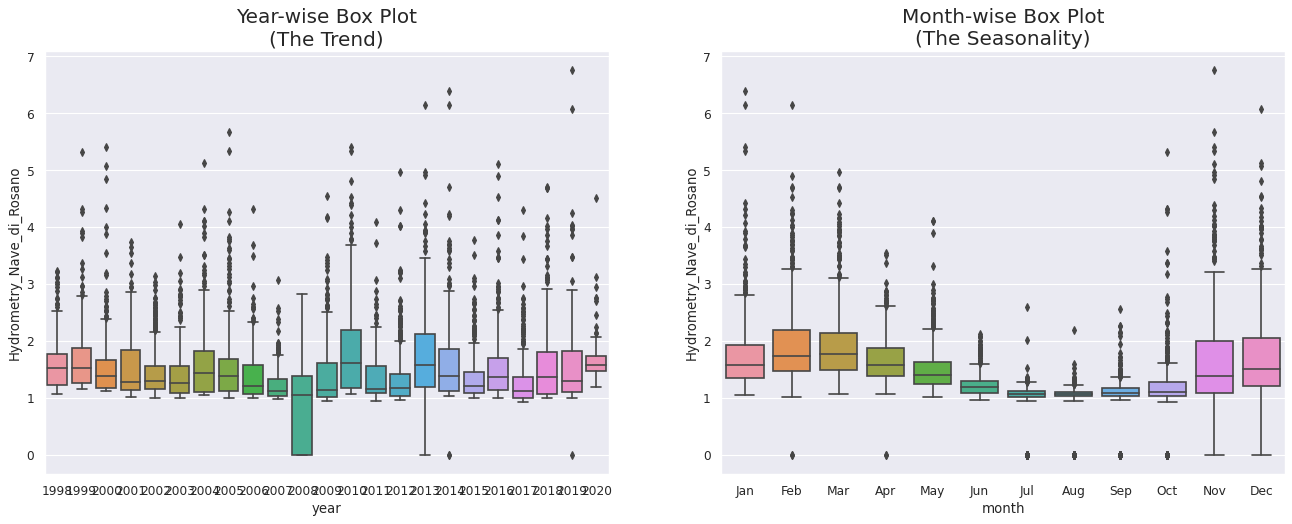

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Hydrometry_Nave_di_Rosano', data=River_Arno, ax=axes[0])
sns.boxplot(x='month', y='Hydrometry_Nave_di_Rosano', data=River_Arno.loc[~River_Arno.year.isin([1998, 2020]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [17]:
River_Arno['Hydrometry_Nave_di_Rosano'].replace(0, np.nan, inplace=True)
fig = px.line(River_Arno,x='Date',y='Hydrometry_Nave_di_Rosano')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

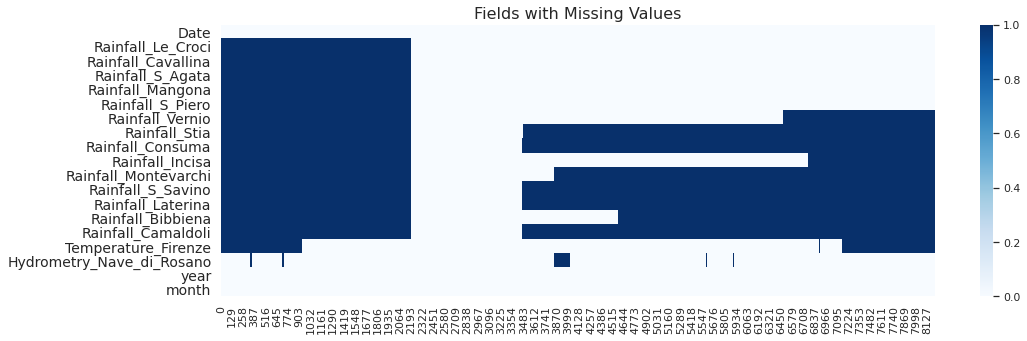

In [18]:
 f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(River_Arno.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [19]:
River_Arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,year,month
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82,1998,Jan
1,1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94,1998,Jan
2,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,1998,Jan
3,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84,1998,Jan
4,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,1998,Jan


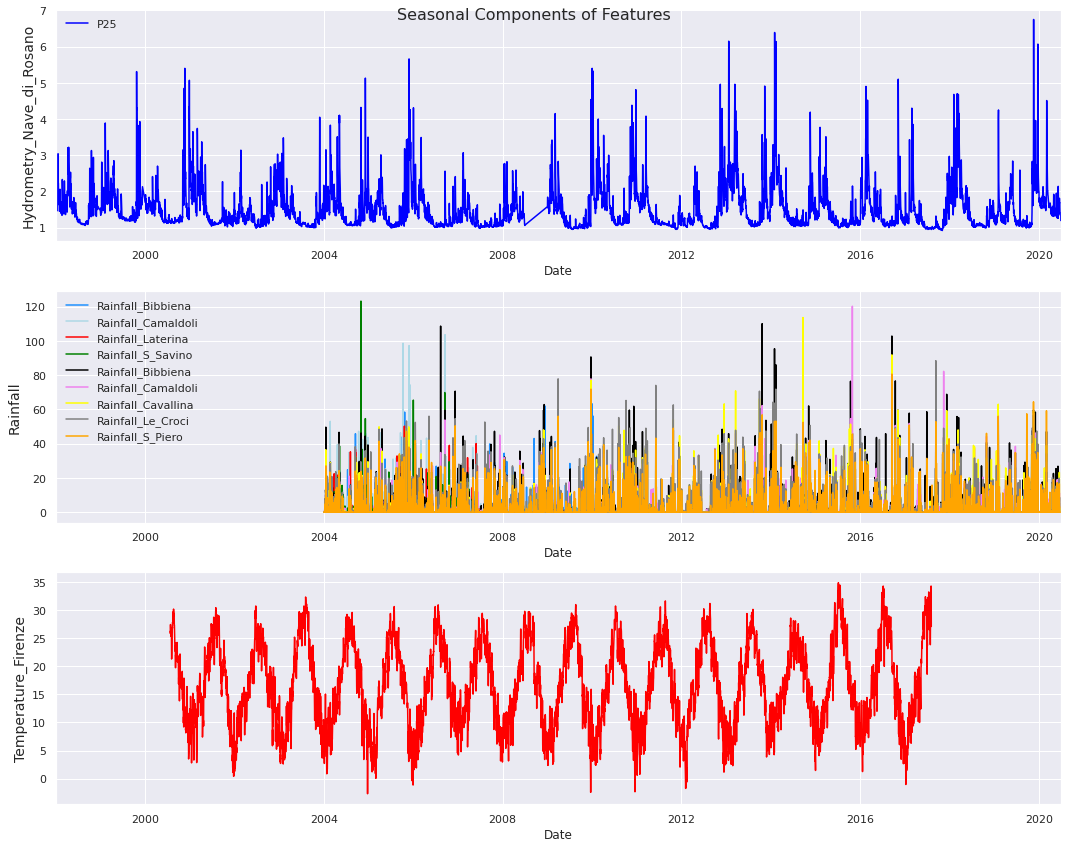

In [20]:
def sns_lineplot():
  f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
  f.suptitle('Seasonal Components of Features', fontsize=16)
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Hydrometry_Nave_di_Rosano, ax=ax[0], color='blue', label='P25')
  ax[0].set_ylabel(ylabel='Hydrometry_Nave_di_Rosano', fontsize=14)

  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Bibbiena, ax=ax[1], color='dodgerblue', label='Rainfall_Bibbiena')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Camaldoli, ax=ax[1], color='lightblue', label='Rainfall_Camaldoli')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Laterina, ax=ax[1], color='red', label='Rainfall_Laterina')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_S_Savino, ax=ax[1], color='green', label='Rainfall_S_Savino')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Mangona, ax=ax[1], color='black', label='Rainfall_Bibbiena')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_S_Agata, ax=ax[1], color='violet', label='Rainfall_Camaldoli')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Cavallina, ax=ax[1], color='yellow', label='Rainfall_Cavallina')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_Le_Croci, ax=ax[1], color='grey', label='Rainfall_Le_Croci')
  sns.lineplot(x=River_Arno.Date, y=River_Arno.Rainfall_S_Piero, ax=ax[1], color='orange', label='Rainfall_S_Piero')
  ax[1].set_ylabel(ylabel='Rainfall', fontsize=14)

  sns.lineplot(x=River_Arno.Date, y=River_Arno.Temperature_Firenze, ax=ax[2], color='red')
  ax[2].set_ylabel(ylabel='Temperature_Firenze', fontsize=14)

  for i in range(3):
      ax[i].set_xlim([date(1998, 1, 1), date(2020, 6, 30)])
  plt.tight_layout()
  plt.show()
sns_lineplot()

## Data Preprocessing

In [21]:
River_Arno.columns

Index(['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano', 'year', 'month'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

features_to_fill = ['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano']

temp_df = River_Arno[features_to_fill].copy()

# Create time related features
temp_df['year'] = pd.DatetimeIndex(temp_df['Date']).year 

temp_df['month'] = pd.DatetimeIndex(temp_df['Date']).month 
month_in_year = 12
temp_df['month_sin'] = np.sin(2*np.pi*temp_df.month/month_in_year)
temp_df['month_cos'] = np.cos(2*np.pi*temp_df.month/month_in_year)

temp_df['season'] = temp_df.month%12 // 3 + 1

temp_df['day_of_year'] = pd.DatetimeIndex(temp_df['Date']).dayofyear
days_in_year = 365.25
temp_df['day_of_year_sin'] = np.sin(2*np.pi*temp_df.day_of_year/days_in_year)
temp_df['day_of_year_cos'] = np.cos(2*np.pi*temp_df.day_of_year/days_in_year)

temp_df['week_of_year'] = pd.DatetimeIndex(temp_df['Date']).weekofyear
weeks_in_year = 52.1429
temp_df['week_of_year_sin'] = np.sin(2*np.pi*temp_df.week_of_year/weeks_in_year)
temp_df['week_of_year_cos'] = np.cos(2*np.pi*temp_df.week_of_year/weeks_in_year)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



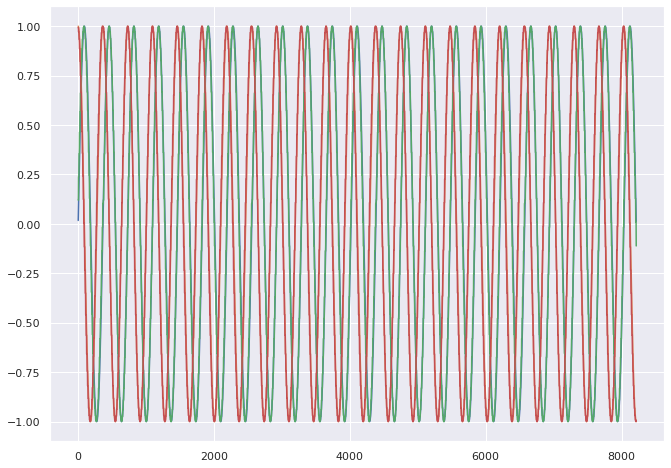

In [23]:
temp_df['day_of_year_sin'].plot()
temp_df['day_of_year_cos'].plot()
temp_df['week_of_year_sin'].plot()
temp_df['week_of_year_cos'].plot()

Rainfall_Le_Croci
(6026, 8)
(6026,)
(8217, 8)
[0.00726644 0.00726644 0.00768683 ... 0.         0.         0.        ]


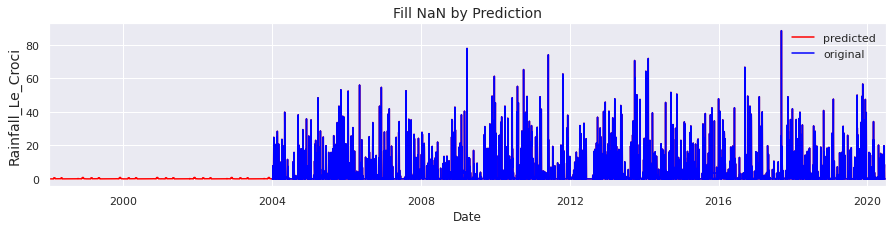

Rainfall_Cavallina
(6026, 8)
(6026,)
(8217, 8)
[1.20903273e-08 1.20903273e-08 1.20903273e-08 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


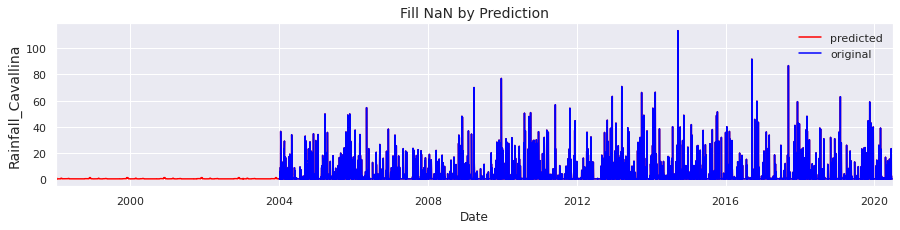

Rainfall_S_Agata
(6026, 8)
(6026,)
(8217, 8)
[0.01678129 0.01678129 0.00178129 ... 0.         0.         0.        ]


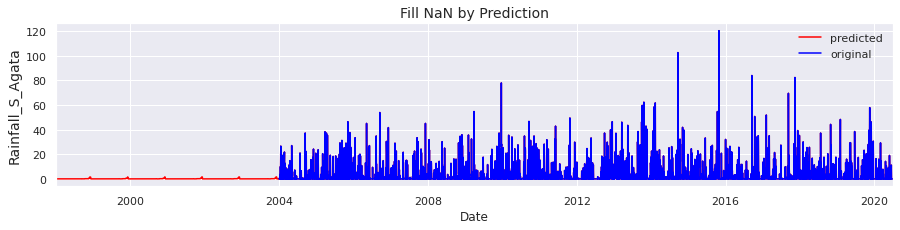

Rainfall_Mangona
(6026, 8)
(6026,)
(8217, 8)
[0. 0. 0. ... 0. 0. 0.]


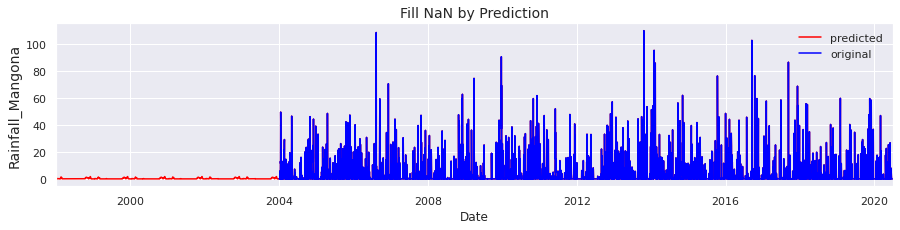

Rainfall_S_Piero
(6026, 8)
(6026,)
(8217, 8)
[0.00670851 0.01707549 0.01707549 ... 0.         0.         0.        ]


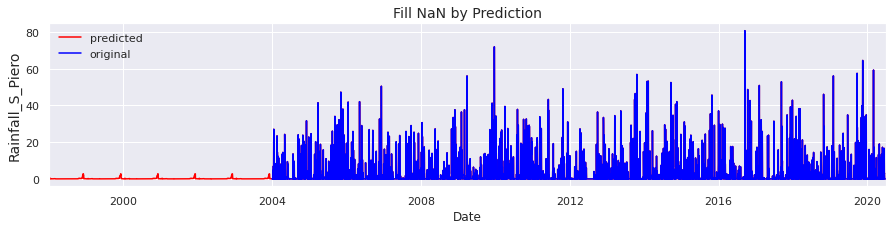

Rainfall_Vernio
(4283, 8)
(4283,)
(8217, 8)
[0.04901978 0.04901978 0.05401978 ... 0.         0.         0.        ]


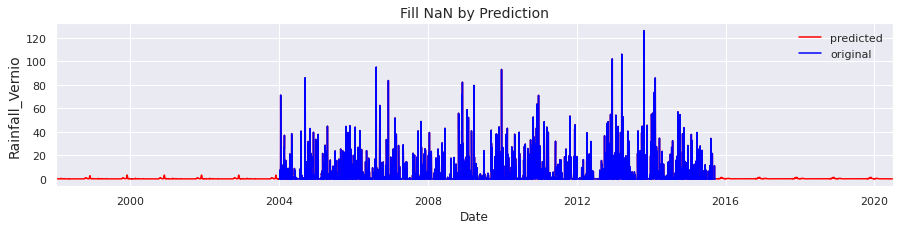

Rainfall_Stia
(1283, 8)
(1283,)
(8217, 8)
[6.79238739e-02 6.79238739e-02 6.79238739e-02 ... 1.33097887e-06
 7.66393465e-06 7.66393465e-06]


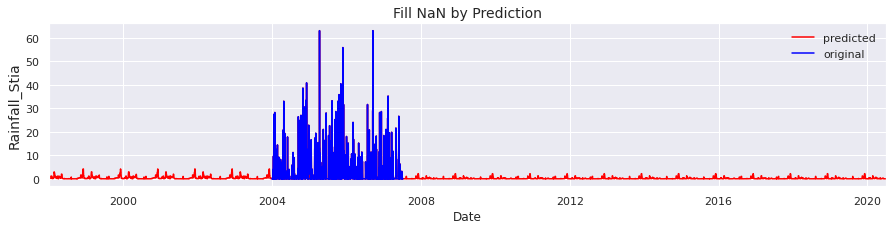

Rainfall_Consuma
(1283, 8)
(1283,)
(8217, 8)
[1.20625001e-05 1.20625001e-05 1.20625001e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


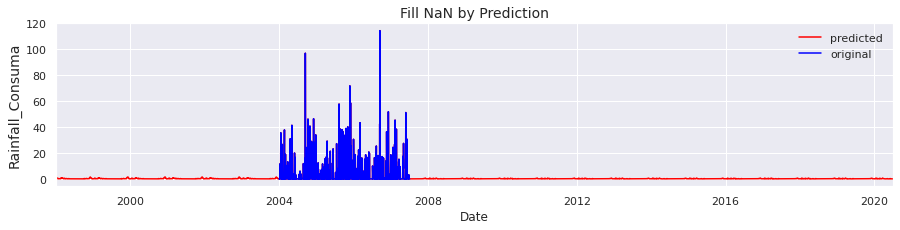

Rainfall_Incisa
(4568, 8)
(4568,)
(8217, 8)
[0.03524846 0.03524846 0.00264623 ... 0.         0.         0.        ]


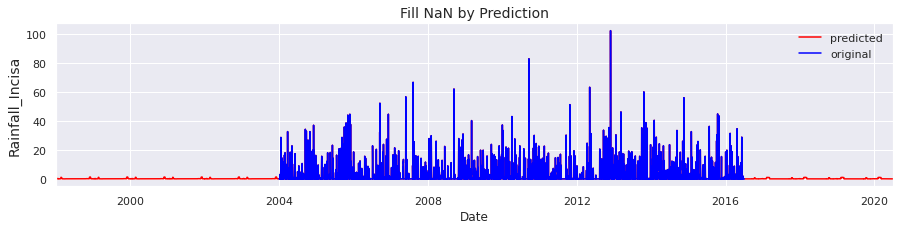

Rainfall_Montevarchi
(1647, 8)
(1647,)
(8217, 8)
[0.03339885 0.03220581 0.03220581 ... 0.         0.         0.        ]


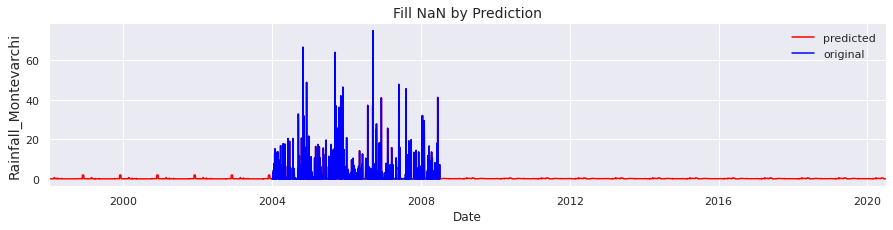

Rainfall_S_Savino
(1283, 8)
(1283,)
(8217, 8)
[0.00704691 0.00704691 0.00704691 ... 0.         0.         0.        ]


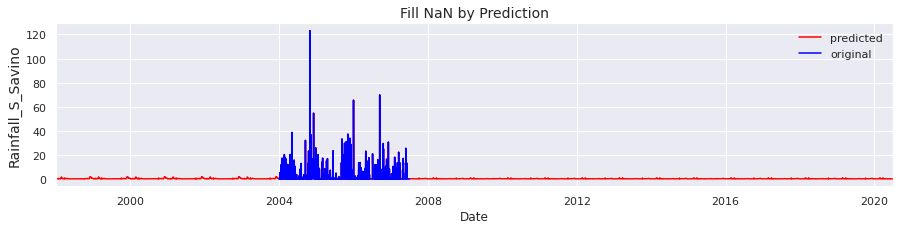

Rainfall_Laterina
(1283, 8)
(1283,)
(8217, 8)
[0. 0. 0. ... 0. 0. 0.]


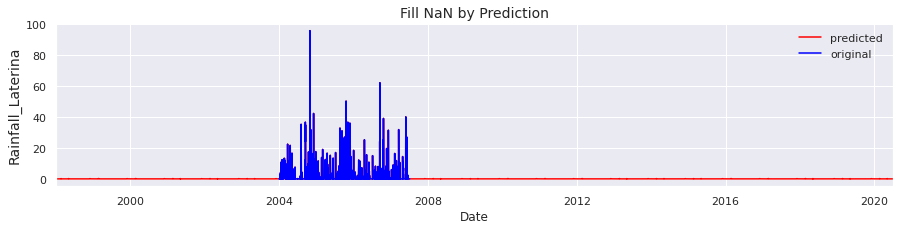

Rainfall_Bibbiena
(2378, 8)
(2378,)
(8217, 8)
[0.03 0.03 0.   ... 0.   0.   0.  ]


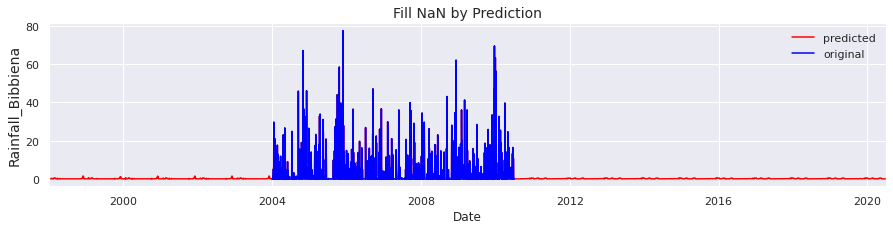

Rainfall_Camaldoli
(1283, 8)
(1283,)
(8217, 8)
[1.01547724e-01 1.01547724e-01 1.01547724e-01 ... 9.20127787e-05
 9.20127787e-05 9.20127787e-05]


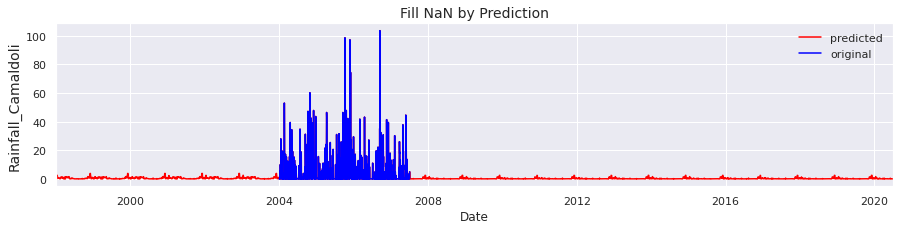

Temperature_Firenze
(6192, 8)
(6192,)
(8217, 8)
[ 9.60522198 12.49227764 12.12194304 ... 29.51441169 30.36672463
 30.64070232]


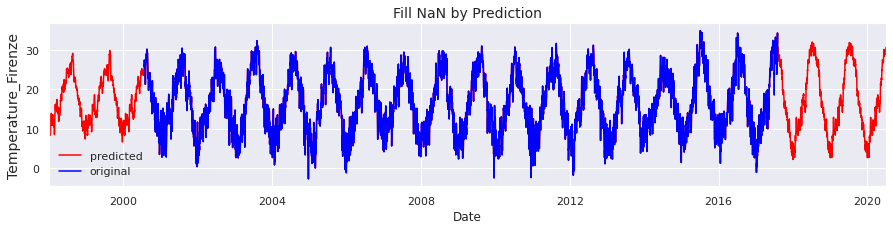

Hydrometry_Nave_di_Rosano
(7982, 8)
(7982,)
(8217, 8)
[1.81997589 1.8257439  1.75310536 ... 1.3000524  1.28261652 1.299814  ]


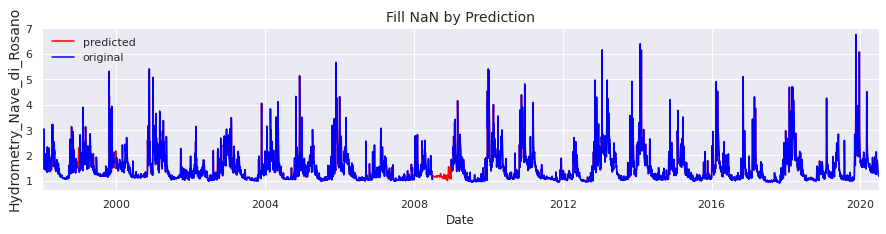

In [24]:
# Prepare training, validation, and test data sets
features = ['month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos', 'year', 'season']

for attribute in features_to_fill[1:]:
    print(attribute)
    target = attribute
    X = temp_df[temp_df[attribute].notna()][features]#.reset_index(drop=True)
    y = temp_df[temp_df[attribute].notna()][target]#.reset_index(drop=True)
    print(X.shape)
    print(y.shape)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    X_test = temp_df[features]#.reset_index(drop=True)
    print(X_test.shape)
    # Model
    params = {'num_leaves': 32,
              'objective': 'regression_l1',
              'max_depth': 8,
              'learning_rate': 0.05,
              "metric": 'mae',
              'seed' : 42
            }

    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=False,  early_stopping_rounds=100)

    y_pred_valid = clf.predict(X_valid)

    old = temp_df[attribute].copy()
    y_pred = clf.predict(X_test)
    print(y_pred)
    River_Arno[attribute] = np.where(River_Arno[attribute].isna(), y_pred, River_Arno[attribute])

    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

    sns.lineplot(x=River_Arno.Date, y=River_Arno[attribute], color='red',label='predicted')
    sns.lineplot(x=River_Arno.Date, y=old.fillna(np.inf), color='blue', label = 'original')
    ax.set_title('Fill NaN by Prediction', fontsize=14)
    ax.set_ylabel(ylabel=attribute, fontsize=14)
    ax.set_xlim([date(1998, 1, 1), date(2020, 6, 30)])
    plt.show()

In [25]:
fig = px.line(River_Arno,x='Date',y='Hydrometry_Nave_di_Rosano')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [26]:
River_Arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,year,month
0,1998-01-01,0.007266,1.209033e-08,0.016781,0.000000,0.006709,0.049020,0.067924,0.000012,0.035248,0.033399,0.007047,0.0,0.03,0.101548,9.605222,1.82,1998,Jan
1,1998-01-02,0.007266,1.209033e-08,0.016781,0.000000,0.017075,0.049020,0.067924,0.000012,0.035248,0.032206,0.007047,0.0,0.03,0.101548,12.492278,1.94,1998,Jan
2,1998-01-03,0.007687,1.209033e-08,0.001781,0.000000,0.017075,0.054020,0.067924,0.000012,0.002646,0.032206,0.007047,0.0,0.00,0.101548,12.121943,2.11,1998,Jan
3,1998-01-04,0.007687,1.088129e-08,0.001781,0.000000,0.017075,0.054007,0.067924,0.000012,0.002646,0.003821,0.007047,0.0,0.00,0.013049,10.929750,1.84,1998,Jan
4,1998-01-05,0.048260,1.088129e-08,0.001781,0.003878,0.001238,0.003117,0.081101,-0.000304,0.002646,0.004266,0.034739,0.0,0.00,0.016576,9.117946,1.88,1998,Jan


In [27]:
River_Arno = River_Arno[River_Arno.year>2003]
River_Arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,year,month
2191,2004-01-01,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,2004,Jan
2192,2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,2004,Jan
2193,2004-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,2004,Jan
2194,2004-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,2004,Jan
2195,2004-01-05,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,2004,Jan


## Train-Test Split

In [28]:
River_Arno.head() 

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,year,month
2191,2004-01-01,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,2004,Jan
2192,2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,2004,Jan
2193,2004-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,2004,Jan
2194,2004-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,2004,Jan
2195,2004-01-05,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,2004,Jan


In [29]:
y = River_Arno['Hydrometry_Nave_di_Rosano']
X = River_Arno.drop(['Hydrometry_Nave_di_Rosano','Date','month','year'],axis=1)
print(X)
print(y)

      Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
2191                0.0                 0.0               0.4   
2192                0.0                 0.0               0.0   
2193                0.0                 0.0               0.0   
2194                0.0                 0.0               0.0   
2195                0.0                 0.0               0.0   
...                 ...                 ...               ...   
8212                0.0                 0.0               0.0   
8213                0.0                 0.0               0.0   
8214                0.0                 0.0               0.0   
8215                0.0                 0.0               0.0   
8216                0.0                 0.0               0.0   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
2191               0.0               0.0              0.0       0.000000   
2192               0.0               0.0              0.0       0.0

In [30]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 2191 to 6408
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_Le_Croci     4218 non-null   float64
 1   Rainfall_Cavallina    4218 non-null   float64
 2   Rainfall_S_Agata      4218 non-null   float64
 3   Rainfall_Mangona      4218 non-null   float64
 4   Rainfall_S_Piero      4218 non-null   float64
 5   Rainfall_Vernio       4218 non-null   float64
 6   Rainfall_Stia         4218 non-null   float64
 7   Rainfall_Consuma      4218 non-null   float64
 8   Rainfall_Incisa       4218 non-null   float64
 9   Rainfall_Montevarchi  4218 non-null   float64
 10  Rainfall_S_Savino     4218 non-null   float64
 11  Rainfall_Laterina     4218 non-null   float64
 12  Rainfall_Bibbiena     4218 non-null   float64
 13  Rainfall_Camaldoli    4218 non-null   float64
 14  Temperature_Firenze   4218 non-null   float64
dtypes: float64(15)
mem

# Models

# LSTM

In [32]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df = River_Arno[['Hydrometry_Nave_di_Rosano']]
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [33]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train), len(test))

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

4218 1808


Windowed LSTM

Epoch 1/100
4214/4214 - 6s - loss: 0.0041
Epoch 2/100
4214/4214 - 6s - loss: 0.0026
Epoch 3/100
4214/4214 - 6s - loss: 0.0023
Epoch 4/100
4214/4214 - 6s - loss: 0.0022
Epoch 5/100
4214/4214 - 6s - loss: 0.0022
Epoch 6/100
4214/4214 - 6s - loss: 0.0022
Epoch 7/100
4214/4214 - 6s - loss: 0.0021
Epoch 8/100
4214/4214 - 6s - loss: 0.0021
Epoch 9/100
4214/4214 - 6s - loss: 0.0021
Epoch 10/100
4214/4214 - 6s - loss: 0.0021
Epoch 11/100
4214/4214 - 6s - loss: 0.0021
Epoch 12/100
4214/4214 - 6s - loss: 0.0020
Epoch 13/100
4214/4214 - 6s - loss: 0.0021
Epoch 14/100
4214/4214 - 6s - loss: 0.0020
Epoch 15/100
4214/4214 - 6s - loss: 0.0020
Epoch 16/100
4214/4214 - 6s - loss: 0.0020
Epoch 17/100
4214/4214 - 6s - loss: 0.0020
Epoch 18/100
4214/4214 - 6s - loss: 0.0020
Epoch 19/100
4214/4214 - 6s - loss: 0.0020
Epoch 20/100
4214/4214 - 6s - loss: 0.0020
Epoch 21/100
4214/4214 - 6s - loss: 0.0020
Epoch 22/100
4214/4214 - 6s - loss: 0.0020
Epoch 23/100
4214/4214 - 6s - loss: 0.0020
Epoch 24/100
4214/42

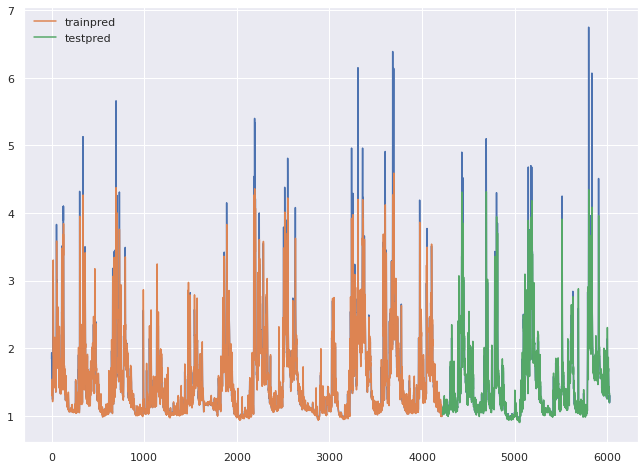

In [35]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label="trainpred")
plt.plot(testPredictPlot,label="testpred")
plt.legend()
plt.show()

Memory betwn batches LSTM

4214/4214 - 8s - loss: 0.0036
4214/4214 - 8s - loss: 0.0026
4214/4214 - 9s - loss: 0.0022
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0021
4214/4214 - 8s - loss: 0.0020
4214/4214 - 9s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 8s - loss: 0.0020
4214/4214 - 9s - loss: 0.0020
4214/4214 

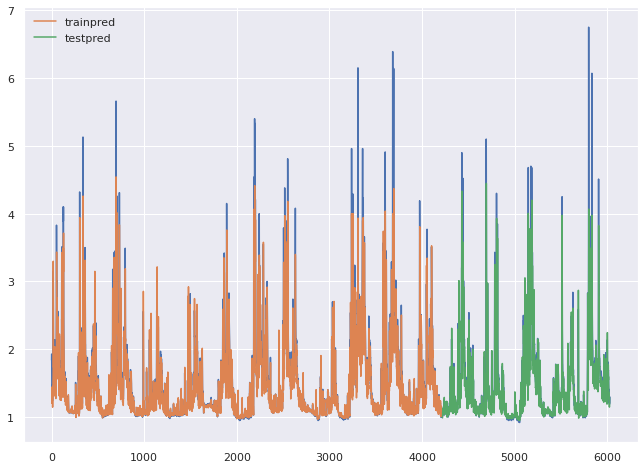

In [37]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label="trainpred")
plt.plot(testPredictPlot,label="testpred")
plt.legend()
plt.show()

stacked LSTM with memory between batches

4214/4214 - 14s - loss: 0.0048
4214/4214 - 14s - loss: 0.0032
4214/4214 - 14s - loss: 0.0024
4214/4214 - 14s - loss: 0.0022
4214/4214 - 14s - loss: 0.0021
4214/4214 - 14s - loss: 0.0021
4214/4214 - 14s - loss: 0.0021
4214/4214 - 14s - loss: 0.0021
4214/4214 - 15s - loss: 0.0021
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 13s - loss: 0.0020
4214/4214 - 13s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 15s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/4214 - 14s - loss: 0.0020
4214/421

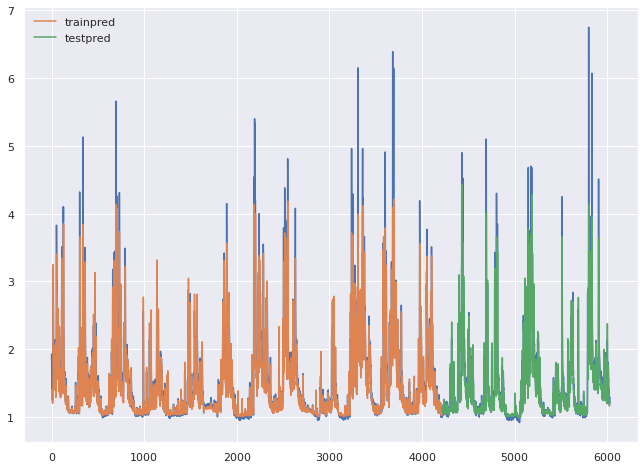

In [38]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label="trainpred")
plt.plot(testPredictPlot,label="testpred")
plt.legend()
plt.show()

## XGBOOST

In [ ]:
# River_Arno.columns

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import KFold, train_test_split, GridSearchCV

# # define model
# model = xgb.XGBRegressor()


In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# print("Parameter optimization")
# xgb_model = xgb.XGBRegressor(n_jobs=1)
# clf = GridSearchCV(xgb_model,scoring = 'neg_mean_absolute_error',
#                    param_grid = {'max_depth': [2, 4, 6],
#                     'n_estimators': [50, 100, 200]}, verbose=1, n_jobs=1)
# clf.fit(X.values, y.values)
# print(clf.best_score_)
# print(clf.best_params_)
# param = clf.best_params_

In [ ]:
# xgb_model = xgb.XGBRegressor(max_depth=4,n_estimators=50).fit(X_train.values, y_train.values)
# predictions = xgb_model.predict(X_test.values)
# actuals = y_test.values
# print('MSE: ')
# print(mean_squared_error(actuals, predictions))
# print('MAE: ')
# print(mean_absolute_error(actuals,predictions))
    
# xgb.plot_importance(xgb_model) 

In [ ]:
# plt.plot(actuals)
# plt.plot(predictions)

## ARIMA

In [ ]:
"""!pip install chart_studio
import chart_studio.plotly as ply
import cufflinks as cf

!pip install pmdarima
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from math import sqrt

from pandas import datetime
from sklearn.metrics import mean_squared_error"""

In [ ]:
"""fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(df.Hydrometry_Nave_di_Rosano); 
axes[0, 0].set_title('Original Series')
plot_acf(df.Hydrometry_Nave_di_Rosano.squeeze(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Hydrometry_Nave_di_Rosano.diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Hydrometry_Nave_di_Rosano.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Hydrometry_Nave_di_Rosano.diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Hydrometry_Nave_di_Rosano.diff().diff().dropna(), ax=axes[2, 1])

plt.show()"""

In [ ]:
"""def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)"""

In [ ]:
"""model = pm.auto_arima(df.Hydrometry_Nave_di_Rosano, start_p=1, start_q=1,
                          test='adf',  # use adftest to find optimal 'd'
                          max_p=5, max_q=5,  # maximum p and q
                          m=4,  # frequency of series
                          d=None,  # let model determine 'd'
                          seasonal=True,  # No Seasonality
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True)"""

In [ ]:
"""stepwise_model.summary()
stepwise_model.fit(train).fit(train)
pred = pd.DataFrame(stepwise_model.fit(train).predict(n_periods = len(test)),index=test.index)
pred.columns = ['pred']
pred
plt.plot(train,label="train")
plt.plot(test,label="test")
plt.plot(pred,label="pred")"""